# Assignment 4



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import geopandas as gpd

In [2]:
datasets_dir = Path('../../../datasets')
# ls ../../

In [3]:
datasets_dir

PosixPath('../../../datasets')

In [4]:
moscow_gdb_path = datasets_dir / 'moscow' / 'moscow_vectors' / 'Moscow.gdb'
print(moscow_gdb_path)
print(type(moscow_gdb_path))

../../../datasets/moscow/moscow_vectors/Moscow.gdb
<class 'pathlib.PosixPath'>


In [5]:
import fiona
moscow_gdb = str(moscow_gdb_path)

fiona.listlayers(moscow_gdb)

['Moscow_Zoning',
 'Centerlines',
 'Moscow_Parks',
 'Moscow_City_Limit',
 'Parcels']

In [6]:
parcels = gpd.read_file(moscow_gdb, layer='Parcels')
roads = gpd.read_file(moscow_gdb, layer='Centerlines')
zoning = gpd.read_file(moscow_gdb, layer='Moscow_Zoning')
city_limits = gpd.read_file(moscow_gdb, layer='Moscow_City_Limit')
parks = gpd.read_file(moscow_gdb, layer='Moscow_Parks')


In [7]:
parcels.columns

Index(['LABEL', 'PM_PAR_14', 'PM_MAIL_NM', 'PM_MAIL_A1', 'PM_MAIL_A2',
       'PM_MAIL_CT', 'PM_MAIL_ST', 'PM_MAIL_ZP', 'PM_PROP_AD', 'PM_DEEDCDT',
       'PM_DEEDRF1', 'PM_DEEDRF2', 'PM_DEEDRF3', 'PM_DEEDRF4', 'PM_DEEDRF5',
       'PM_TAX_AMT', 'PM_PV_AREA', 'PM_PV_NBHD', 'PM_PV_ACRE', 'PM_TOT_VAL',
       'PM_IMP_VAL', 'PM_LND_VAL', 'PM_EX_VAL', 'PM_NET_VAL', 'PM_CATS',
       'LG_LINE_1', 'LG_LINE_2', 'LG_LINE_3', 'LG_LINE_4', 'LG_LINE_5',
       'LG_LINE_6', 'PM_PARC_CD', 'GlobalID', 'Shape_Length', 'Shape_Area',
       'geometry'],
      dtype='object')

### Shapely geometries
Behind the scenes, geopandas is reading in vector data, storing the attribute tables as `pandas` dataframes,
and storing the vector geometry as `shapely` geometries.


### Reading:
To become more familiar with vector operations in geopandas/shapely, 
read this introduction to shapely geometries carefully, 
and reproduce/experiment with the code in this reading from within a blank notebook:
https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361

Read this page for a more comprehensive description of `shapely` geometries: 
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html

Scroll through the `shapely` user manual (https://shapely.readthedocs.io/en/stable/manual.html), 
reviewing the different functions that shapely includes.  `geopandas` allows all of these functions to be
executed, [directly through `geopandas`, without explicit call to `shapely`](https://geopandas.org/docs/user_guide/geometric_manipulations.html).  `shapely` is just running
quietly under the hood.  Pay specific attention to the "Spatial Analysis Methods" of the manual.

In [8]:
from shapely.geometry import LineString
line = LineString([(0, 0), (1, 1), (2, 0)])
print('Line area =', line.area)
print('Line length =', line.length)

Line area = 0.0
Line length = 2.8284271247461903


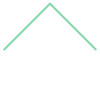

In [9]:
line

In [10]:
type(line)

shapely.geometry.linestring.LineString

In [11]:
print( list(line.coords) )
print( line.coords[2] )

[(0.0, 0.0), (1.0, 1.0), (2.0, 0.0)]
(2.0, 0.0)


<div class="alert alert-block alert-warning">

## Shapely geometries
What `shapely` geometry are each of the parcels in the Moscow parcels layer? What `shapely` geometry are their centroids?
    
Find the Kenworthy Theater within the parcels database (hint: the name field for its mailing address, 
    PM_MAIL_NM, is "KENWORTHY PERFORMING ARTS CTR").
What are the coordinates for the corners of its parcel?    
</div>


In [21]:
parcels.geometry

0       MULTIPOLYGON (((2310895.129 1842403.524, 23110...
1       MULTIPOLYGON (((2311059.420 1842229.329, 23110...
2       MULTIPOLYGON (((2313927.891 1843762.528, 23140...
3       MULTIPOLYGON (((2310936.696 1850758.583, 23109...
4       MULTIPOLYGON (((2310938.447 1850916.273, 23110...
                              ...                        
7389    MULTIPOLYGON (((2309810.585 1844883.291, 23097...
7390    MULTIPOLYGON (((2309630.922 1844876.652, 23096...
7391    MULTIPOLYGON (((2309722.005 1844975.767, 23097...
7392    MULTIPOLYGON (((2309711.261 1844923.808, 23096...
7393    MULTIPOLYGON (((2315750.007 1843514.088, 23157...
Name: geometry, Length: 7394, dtype: geometry

In [50]:
np.where(parcels.PM_MAIL_NM == 'KENWORTHY PERFORMING ARTS CTR')

(array([1359]),)

In [47]:

parcels.geometry[1360]
parcels.iloc[1359]

LABEL                                                        002B
PM_PAR_14                                          RPM0001005002B
PM_MAIL_NM                          KENWORTHY PERFORMING ARTS CTR
PM_MAIL_A1                                             508 S MAIN
PM_MAIL_A2                                                       
PM_MAIL_CT                                                 MOSCOW
PM_MAIL_ST                                                     ID
PM_MAIL_ZP                                                83843.0
PM_PROP_AD                                             508 S MAIN
PM_DEEDCDT                                             20010202.0
PM_DEEDRF1                                                 455001
PM_DEEDRF2                                                 448268
PM_DEEDRF3                                                       
PM_DEEDRF4                                                       
PM_DEEDRF5                                                       
PM_TAX_AMT

In [19]:
parcels.centroid

0       POINT (2312316.563 1841855.854)
1       POINT (2310889.377 1842183.675)
2       POINT (2314032.262 1843722.904)
3       POINT (2310999.398 1850776.387)
4       POINT (2310997.470 1850854.715)
                     ...               
7389    POINT (2309827.633 1844939.828)
7390    POINT (2309631.082 1844892.130)
7391    POINT (2309678.033 1844935.229)
7392    POINT (2309702.081 1844949.559)
7393    POINT (2315761.545 1843658.201)
Length: 7394, dtype: geometry

## Property sales over time

In [51]:
import pandas as pd
print( parcels['PM_DEEDCDT'].astype(str)[:4] )

parcels['SaleDate'] = pd.to_datetime(
    parcels['PM_DEEDCDT'], 
    errors='coerce', 
    format='%Y%m%d')




0    20120925.0
1    20120925.0
2           0.0
3    20190815.0
Name: PM_DEEDCDT, dtype: object


In [52]:
parcels['SaleDate']

0      2012-09-25
1      2012-09-25
2             NaT
3      2019-08-15
4      2019-08-15
          ...    
7389          NaT
7390          NaT
7391          NaT
7392          NaT
7393          NaT
Name: SaleDate, Length: 7394, dtype: datetime64[ns]

In [53]:
dates = parcels['PM_DEEDCDT'].to_numpy()
yr = np.full( dates.shape, np.nan )

for i in range(len(dates)):
    if dates[i] > 0:
        yr[i] = int( str(dates[i])[:4] )
#         print(date)
    else:
        yr[i] = np.nan
#     print(date)
# np.datetime_as_string(parcels['SaleDate'])

parcels['SaleYear'] = yr
# parcels['SaleYear'] = parcels['SaleDate'].to_numpy().astype('M8[Y]')

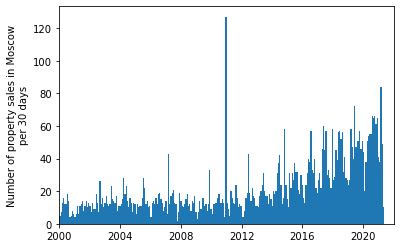

In [67]:
bin_size = np.timedelta64(365, 'D')/12 # days
fig, ax = plt.subplots()
ax.hist(parcels['SaleDate'], bins=np.arange(np.datetime64('1990-01-01'), 
                                            np.datetime64('2022-01-01'), 
                                            bin_size ) )
ylabel_text = 'Number of property sales in Moscow\nper ' + str(bin_size.astype(int)) + ' days'
ax.set_ylabel(ylabel_text)
ax.set_xlim(np.datetime64('2000-01-01'), np.datetime64('2022-01-01') );
# ax.set_xlim(np.datetime64('2010-12-15'), np.datetime64('2011-01-01') )

# Note that the sales at the end of 2010 are anomalous, and are all recorded on the same day.
# That's suspicious and Tim thinks that it must be some change in accounting or record keeping.

In [ ]:
# parcels['SaleDate'].to_numpy().astype('M8[Y]')

In [ ]:
# [np.datetime64(i,'Y') for i in parcels['SaleYear'][:2]]


In [ ]:
parcels['SaleYear'][:2].astype('float64')

In [ ]:
parks[1]

In [ ]:
buffer_radius = 1000

for i in range( len(parks) ):

    buffered_park = parks.iloc[i:i+1].buffer(buffer_radius) # Careful!  I'm not sure why this is, but geopandas requires a slice here, not a single index
    # .buffer(buffer_radius) # Buffer in native dimensions, feet
    overlapping_parcels = parcels.overlaps(buffered_park.geometry.to_numpy()[0]) 
    # buffered_park.plot()



<div class="alert alert-block alert-warning">

## Identifying Moscow residents underserved by city parks.
You're an urban planner consulting with the City of Moscow.  The city is interested in increasing the number of parks
    within the city, and better designing those parks to meet the needs of those who are currently underserved
    by the city's existing parks.  The city wants to begin the planning process by reaching out to these currently
    underserved residents, but first the city needs to know who they are.
    
The city asks you to produce a list of all resident addresses within the city limits whose property is at least 1000 feet
    from a current park.
    
To properly address the letters and questionaires that the city will be sending out, the city would like this list
    of residents as a csv file, with each property address on a separate line (property addresses are represented within
    the parcels database by the field name "PM_PROP_AD").  Produce this file and a map of the underserved parcels.
    


</div>

In [ ]:
sum(overlapping_parcels)

In [ ]:
buffered_park.geometry.to_numpy()[0]

In [12]:
%matplotlib widget

fig, ax = plt.subplots()
parks.buffer(1000).plot(ax=ax, color='g')
# city_limits.plot(ax=ax, color=None, edgecolor='r')
roads.plot(ax=ax)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(1837691.7277759165, 1858582.946164012)

In [ ]:
parcels.centroid

In [ ]:
roads

In [ ]:
zoning.columns

In [ ]:
from shapely.geometry import Polygon, LineString, Point
parcels['Dwntn_dist'] = parcels.distance(Point(2.311e6, 1.85e6))

In [ ]:
city_limits.bounds


In [ ]:
parcels

In [ ]:
%matplotlib widget
fig, ax = plt.subplots( figsize=(8,8) )
# parcels.plot(column='Val_per_foot', ax=ax, legend=True, vmax=200);
# parcels.plot(column='PM_TOT_VAL', ax=ax, legend=True, vmax=400000);
# parcels.plot(column='PM_IMP_VAL', ax=ax, legend=True, vmin=150000, vmax=600000);

# parcels.plot(column='Dwntn_dist', ax=ax, legend=True, vmax=5280);
zoning.plot(column='LANDUSECODE', ax=ax)

# parcels.plot(column= 'SaleYear', ax=ax, legend=True, vmin=1990)

ax.set_xlim( city_limits.bounds.to_numpy()[0][::2] )
ax.set_ylim( city_limits.bounds.to_numpy()[0][1::2] )

roads.plot(ax=ax, color='gray')

In [ ]:
city_limits.bounds
# ax.set_xlim( city_limits.bounds.to_numpy()[0][:] )
city_limits.bounds.to_numpy()[0][:]


<div class="alert alert-block alert-warning">

### How long ago did 50% of the properties change hands?
As in, fill in the blank: "Half of properties in the Moscow area have been sold within _____ years."
</div>

<div class="alert alert-block alert-warning">

### Investing in downtown property
You are the GIS consultant for a property investment company that specializes in
downtown and higher-density properties.  Your company is considering Moscow real estate.
You've heard about the boom in sales within the city, and your company would like to know how competitive
property purchasing will be, or if they will be able to drive a hard bargin.

Has the downtown property market heated up as much as the city as a whole?
Compare sale rates within the "Urban Commercial" zoned regions and 
"Urban Residential, Medium Density" zoned regions with those of the city as a whole.
    
Is there anything else in these data that you would like to share with your colleagues
    that could help advise them as you consider this investment?
</div>

In [ ]:
fig, ax = plt.subplots()
ax.hist(parcels['Val_per_foot'].to_numpy(), bins=np.arange(0, 200, 10) )


<div class="alert alert-block alert-warning">

### Find, plot, work with data
Find a spatial, vector dataset either online (by googling, from another class, or from a research project of yours), 
download or copy it into the current directory, plot it,
and use geopandas to draw on the attributes of that data (even just lengths, areas, etc) and tell me something about that data.
</div>

### Bandit violating parole?

### Auto-transform the CRS? - good for functions

### Parcels close to schools and parks?